# Employee Attrition Prediction

## Loading Libraries

In [1]:
# Basic Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE


In [4]:
from sklearn.tree import ExtraTreeClassifier

In [5]:
#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             confusion_matrix)
from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split)

from sklearn.pipeline import make_pipeline # For performing a series of operations

from sklearn.metrics import plot_confusion_matrix


In [6]:
df = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

### Getting a Feel of the data

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df.dtypes.unique() # There are the only available datatypes in our dataset

array([dtype('int64'), dtype('O')], dtype=object)

### 5 number summary

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
df.Attrition.describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

In [13]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

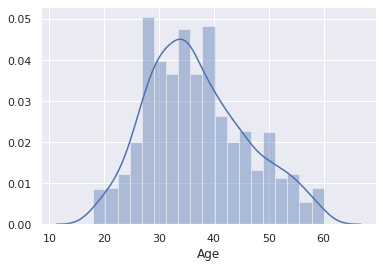

In [15]:
sns.distplot(df.Age) # Age is unimodal

In [16]:
df.Age.describe() # Age is Normally Distributed

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [17]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [19]:
num_cat = df.select_dtypes(exclude='O')
num_cat_cols = num_cat.columns
num_cat_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

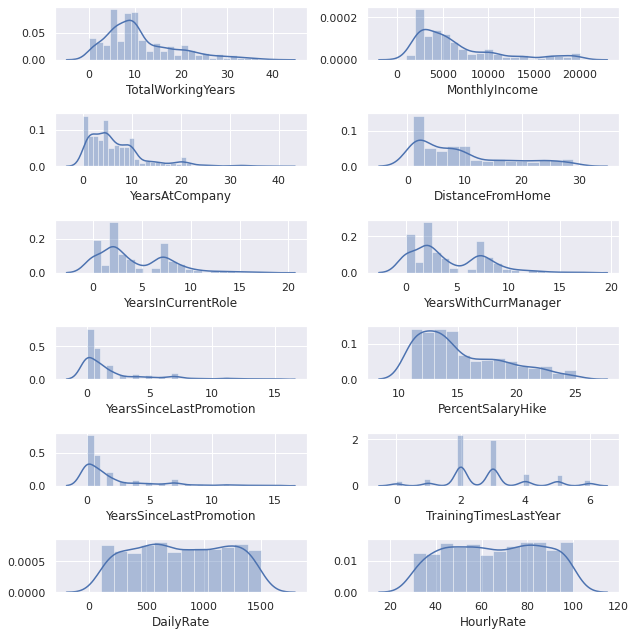

In [20]:
fig,ax = plt.subplots(6,2,figsize=(9,9))
sns.distplot(df['TotalWorkingYears'],ax=ax[0,0])
sns.distplot(df['MonthlyIncome'],ax=ax[0,1])
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
sns.distplot(df['DailyRate'], ax = ax[5,0]) 
sns.distplot(df['HourlyRate'], ax = ax[5,1]) 
plt.tight_layout()

In [21]:
cat_df = df.select_dtypes(include='O')
cat_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [23]:
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [24]:
# function to plot all categorical variables
def plot_cat(attr):
    #sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)
    data = [go.Bar(
            x=df[attr].value_counts().index.values,
            y= df[attr].value_counts().values
    )]
    py.iplot(data, filename='basic-bar')


    

In [25]:
plot_cat('Attrition')

**The data is imbalanced**

In [26]:
plot_cat(df.BusinessTravel.name)

In [27]:
plot_cat(df.EducationField.name)

In [28]:
plot_cat(df.Department.name)

In [29]:
plot_cat(df.Gender.name)

In [30]:
plot_cat(df.MaritalStatus.name)

In [31]:
plot_cat(df.JobRole.name)

In [32]:
plot_cat(df.Over18.name)

In [33]:
df.Over18.describe()

count     1470
unique       1
top          Y
freq      1470
Name: Over18, dtype: object

In [34]:
df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [35]:
plot_cat(df.OverTime.name)

In [ ]:
# def plot_num(attr):
#     sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)
    

In [ ]:
# for i in num_cat_cols:
#     plot_num(i)


## 2. Checking Correlation
    1.Using heatmap

In [36]:
cor_mat = df.corr()

In [37]:
np.amin(cor_mat) # No serious -ve correlation can be seen

Age                        -0.021490
DailyRate                  -0.050990
DistanceFromHome           -0.036942
Education                  -0.027128
EmployeeCount                    NaN
EmployeeNumber             -0.069861
EnvironmentSatisfaction    -0.049857
HourlyRate                 -0.071335
JobInvolvement             -0.029071
JobLevel                   -0.034730
JobSatisfaction            -0.071335
MonthlyIncome              -0.027269
MonthlyRate                -0.036746
NumCompaniesWorked         -0.118421
PercentSalaryHike          -0.040490
PerformanceRating          -0.031351
RelationshipSatisfaction   -0.069861
StandardHours                    NaN
StockOptionLevel           -0.045952
TotalWorkingYears          -0.035662
TrainingTimesLastYear      -0.066054
WorkLifeBalance            -0.037848
YearsAtCompany             -0.118421
YearsInCurrentRole         -0.090754
YearsSinceLastPromotion    -0.036814
YearsWithCurrManager       -0.110319
dtype: float64

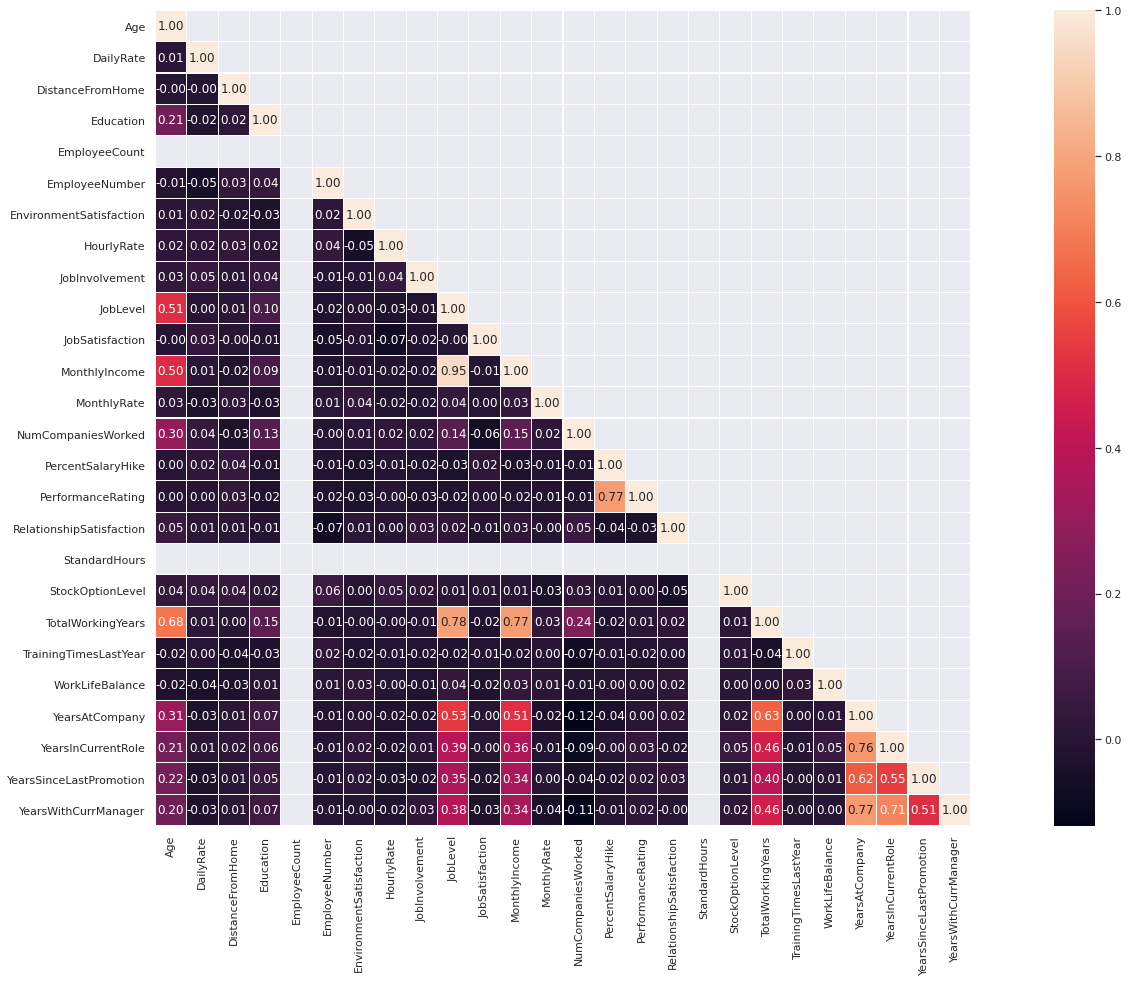

In [38]:

mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,15)
sns.heatmap(data=cor_mat,mask=mask,fmt='.2f',linewidths=0.1,square=True,annot=True,cbar=True)

**Observations**

    1. Job level has a positive correlation with Age (0.51) - Aged employees are seniors
    2. Monthly Income has a positive correlation with Age (0.50) and Job Level (0.95) - Aged Employees are seniors and have higher salary
    3. Performance Rating has a strong +ve correlation with percent salary hike (0.77) - Hike is based on performance
    4. Total working years has a strong +ve correlation with Age (0.68),Job level(0.78) and Monthly Income (0.77) which is  obvious
    5. Years in current core is highly correlated with years at company (0.76)
    6. Years since last promotion is well correlated with years at company (0.62) - More the no of years at company more the chances pf promotion
    7. Years with current manager is highly correlated with years at company(0.77) and years in current role (0.71)
    8. Years with current manager is also correlated with years since last promotion (0.51)
    9. Years at con=mpany has a +ve correlation with age (0.31) and Job level (0.53), Monthly income (0.51) and Total       working years (0.63)

#### Till Now, we have plotted individual features and visualzed the correlation. Now, Lets plot against target variable

In [39]:
# Creating a function to plot against target variable
def plot_target(attr):
    if attr == df.Age.name:
        sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')
        return
    sns.factorplot(data=df,kind='count',x=df.Attrition.name,col = attr)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



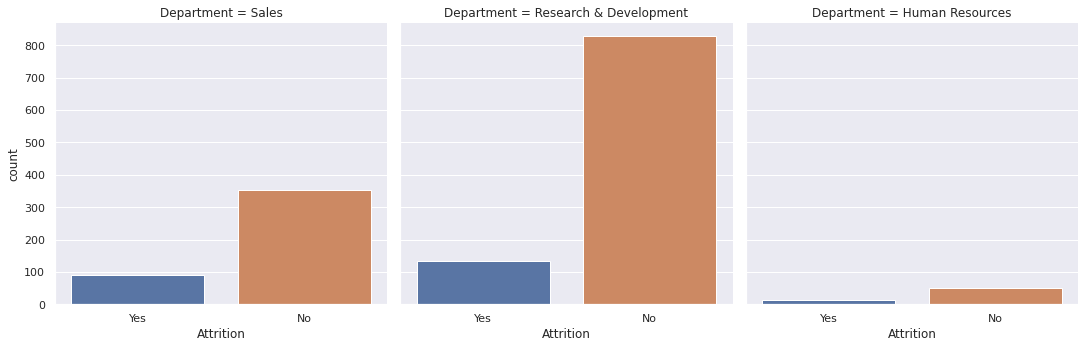

In [40]:
plot_target(df.Department.name)

In [41]:
#pd.crosstab(columns=df.Attrition,index=df.Department,values=df.Attrition,aggfunc='mean')
pd.crosstab(columns=df.Attrition,index=df.Department,normalize='index') # normailze = index gives row wise mean

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278


[Cross Table Reference](https://pbpython.com/pandas-crosstab.html)

    1. 19 % HR Employees Leave
    2. 13% R&D Employyes Leave
    3. 20% Sales Employees Leave

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



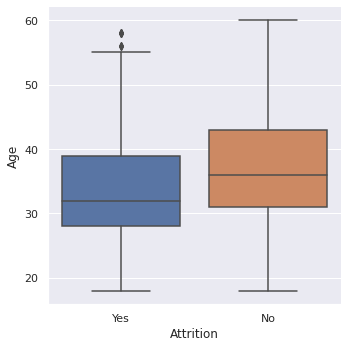

In [42]:
plot_target('Age')


**People who have higher age - Seniors have less tendency to leave the organization as compared to Young employees.**

**This is true as young employees look to explore oppurtunites and experiment with their careers, whereas aged employees have already been there and done that. Now they have settled for good.**

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



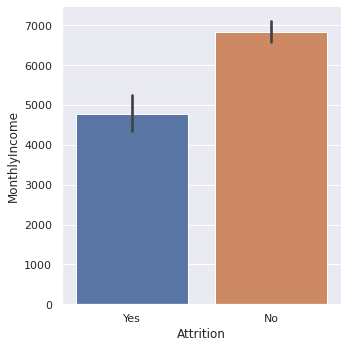

In [43]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

**Employees with High income dont quit**

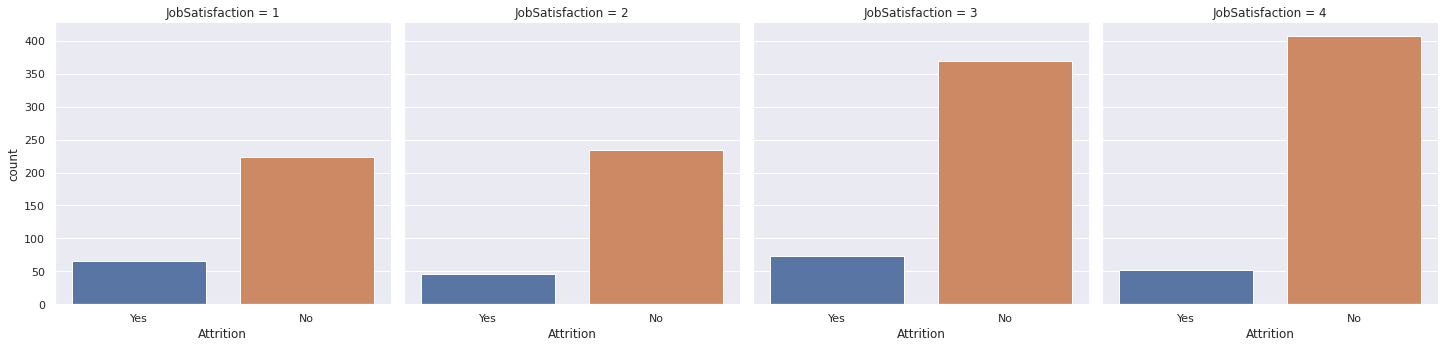

In [44]:
plot_target(df.JobSatisfaction.name)

**Job Satisfaction level 1 and level 3 employees quit the most. Why Level 3 Though?**

**Maybe because the no of employees with job satisfaction level 3 are more. Hence the trend** 

In [45]:
age_cross_tab = pd.crosstab(columns=df.Attrition,index=df.Age,margins_name='Total',margins=True)

In [46]:
age_cross_tab['Attrition_Ratio'] = age_cross_tab.Yes/age_cross_tab.Total

In [47]:
age_cross_tab

Attrition,No,Yes,Total,Attrition_Ratio
Age,,,,
18,4,4,8,0.500000
19,3,6,9,0.666667
20,5,6,11,0.545455
21,7,6,13,0.461538
22,11,5,16,0.312500
23,10,4,14,0.285714
24,19,7,26,0.269231
25,20,6,26,0.230769
26,27,12,39,0.307692


    . Attrition Ratio is the Highest for Age 19

In [48]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


    1. 14.7% females left
    2. 17% males left
    3. Overall 16.1% employees left

In [49]:
pd.crosstab(columns=df.Attrition,index=df.JobLevel,margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


**People from job level 1 leave the most followed by job level 3**

In [50]:
pd.crosstab(columns=df.Attrition,index=[df.JobLevel,df.JobSatisfaction],margins=True,normalize='index')

Attrition                       No       Yes
JobLevel JobSatisfaction                    
1        1                0.613208  0.386792
         2                0.731481  0.268519
         3                0.734568  0.265432
         4                0.820359  0.179641
2        1                0.872549  0.127451
         2                0.907216  0.092784
         3                0.871166  0.128834
         4                0.947674  0.052326
3        1                0.800000  0.200000
         2                0.864865  0.135135
         3                0.906250  0.093750
         4                0.835821  0.164179
4        1                0.952381  0.047619
         2                0.954545  0.045455
         3                0.928571  0.071429
         4                0.971429  0.028571
5        1                0.900000  0.100000
         2                0.875000  0.125000
         3                0.960000  0.040000
         4                0.944444  0.055556
All                       0.838776  0.161224

**People with Job Satisfaction 1 - Poor leave the most**

In [51]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


**Poor (1) Environment Satisfaction also results in employee leaving the company**

In [52]:
pd.crosstab(columns=[df.Attrition],index=df.YearsWithCurrManager,margins=True,normalize='index')

Attrition,No,Yes
YearsWithCurrManager,,
0,0.676806,0.323194
1,0.855263,0.144737
2,0.854651,0.145349
3,0.866197,0.133803
4,0.887755,0.112245
5,0.870968,0.129032
6,0.862069,0.137931
7,0.856481,0.143519
8,0.906542,0.093458


**It can be seen that employees with new managers leave the most. Could it be an Unhealthy relationship between the both**

In [53]:
pd.crosstab(columns=[df.Attrition],index=df.YearsSinceLastPromotion,margins=True,normalize='index')

Attrition,No,Yes
YearsSinceLastPromotion,,
0,0.810671,0.189329
1,0.862745,0.137255
2,0.830189,0.169811
3,0.826923,0.173077
4,0.918033,0.081967
5,0.955556,0.044444
6,0.812500,0.187500
7,0.789474,0.210526
8,1.000000,0.000000


**Promotion can also be a reason for the employee leaving**

In [54]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


**More Employees with Poor work life balance leave**

In [55]:
pd.crosstab(columns=[df.Attrition],index=[df.BusinessTravel],margins=True,normalize='index')

Attrition,No,Yes
BusinessTravel,,
Non-Travel,0.920000,0.080000
Travel_Frequently,0.750903,0.249097
Travel_Rarely,0.850431,0.149569
All,0.838776,0.161224


## Feature Selection

In [56]:
# Using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [57]:
df.shape

(1470, 35)

In [58]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Feature Encoding

### Encoding Salary to low medium high

In [59]:
# Ecoding to low medium high based on ranges 
def encode_salary(salary):
    if salary>=1009 and salary < 7339:
        return 'Low'
    elif salary>=7339 and salary < 13669:
        return 'Medium'
    elif salary >=13669 and salary <= 19999:
        return 'High'
    

In [60]:
df['Income_Cat'] = df['MonthlyIncome'].apply(encode_salary)

In [61]:
df.Income_Cat.value_counts()

Low       1048
Medium     267
High       155
Name: Income_Cat, dtype: int64

In [62]:
df.Income_Cat.shape

(1470,)

In [63]:
df.isnull().sum(axis=0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [64]:
df.Income_Cat.value_counts()

Low       1048
Medium     267
High       155
Name: Income_Cat, dtype: int64

In [65]:
dic = {'Low':0,'Medium':1, 'High':2}
df.Income_Cat = df.Income_Cat.map(dic)
df.Income_Cat.head()

0    0
1    0
2    0
3    0
4    0
Name: Income_Cat, dtype: int64

In [66]:
df.Income_Cat.value_counts()

0    1048
1     267
2     155
Name: Income_Cat, dtype: int64

In [67]:
df.shape

(1470, 36)

### Dropping column which we think arent important

In [68]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear','MonthlyIncome'],axis=1,inplace=True)

In [69]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Income_Cat
0,41,Yes,Sales,1,2,Life Sciences,2,Female,3,2,...,11,3,1,8,1,6,4,0,5,0
1,49,No,Research & Development,8,1,Life Sciences,3,Male,2,2,...,23,4,4,10,3,10,7,1,7,0
2,37,Yes,Research & Development,2,2,Other,4,Male,2,1,...,15,3,2,7,3,0,0,0,0,0
3,33,No,Research & Development,3,4,Life Sciences,4,Female,3,1,...,11,3,3,8,3,8,7,3,0,0
4,27,No,Research & Development,2,1,Medical,1,Male,3,1,...,12,3,4,6,3,2,2,2,2,0


In [70]:
df.shape

(1470, 24)

In [71]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Income_Cat'],
      dtype='object')

In [72]:
def feature_encode(feature):
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    print(le.classes_)

In [73]:
cat_df = df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [74]:
for col in cat_df.columns:
    feature_encode(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [75]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Income_Cat
0,41,1,2,1,2,1,2,0,3,2,...,11,3,1,8,1,6,4,0,5,0
1,49,0,1,8,1,1,3,1,2,2,...,23,4,4,10,3,10,7,1,7,0
2,37,1,1,2,2,4,4,1,2,1,...,15,3,2,7,3,0,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,11,3,3,8,3,8,7,3,0,0
4,27,0,1,2,1,3,1,1,3,1,...,12,3,4,6,3,2,2,2,2,0


In [76]:
df.Income_Cat.value_counts()

0    1048
1     267
2     155
Name: Income_Cat, dtype: int64

In [77]:
df.dtypes

Age                         int64
Attrition                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EnvironmentSatisfaction     int64
Gender                      int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
TotalWorkingYears           int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
Income_Cat                  int64
dtype: object

### We have encoded categorical data. Everything is now numerical, but are of varying magnitudes and range.
#### It is important we perform feature scaling in such cases

### Feature Scaling

In [78]:
# scaler = StandardScaler()

In [79]:
# scaled_df = scaler.fit_transform(df.drop('Attrition',axis=1))
# X= scaled_df
# Y = df['Attrition'].to_numpy()

In [80]:
# X = df.loc[:,df.columns!='Attrition']
# X.head()

In [81]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Income_Cat
0,41,1,2,1,2,1,2,0,3,2,...,11,3,1,8,1,6,4,0,5,0
1,49,0,1,8,1,1,3,1,2,2,...,23,4,4,10,3,10,7,1,7,0
2,37,1,1,2,2,4,4,1,2,1,...,15,3,2,7,3,0,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,11,3,3,8,3,8,7,3,0,0
4,27,0,1,2,1,3,1,1,3,1,...,12,3,4,6,3,2,2,2,2,0


In [82]:
# Y = df['Attrition']
# Y.head()

## Splitting into Train & Test data

In [83]:
X_2 = df.loc[:, df.columns != "Attrition"].values # All columns except Attrition
y_2 = df.loc[:, df.columns == "Attrition"].values.flatten() # Attrition column and flatten to bring it to row format

In [84]:
X_2

array([[41,  2,  1, ...,  0,  5,  0],
       [49,  1,  8, ...,  1,  7,  0],
       [37,  1,  2, ...,  0,  0,  0],
       ...,
       [27,  1,  4, ...,  0,  3,  0],
       [49,  2,  2, ...,  0,  8,  0],
       [34,  1,  8, ...,  1,  2,  0]])

In [85]:
y_2

array([1, 0, 1, ..., 0, 0, 0])

In [86]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.2, stratify=y_2, random_state=1)

In [87]:
X_train_2

array([[30,  1,  7, ...,  0,  0,  0],
       [34,  2, 10, ...,  0,  7,  0],
       [27,  1, 17, ...,  7,  7,  0],
       ...,
       [40,  1,  9, ...,  0,  0,  0],
       [46,  2,  9, ...,  4,  7,  1],
       [31,  0,  8, ...,  0,  2,  0]])

In [88]:
y_train_2

array([0, 0, 1, ..., 0, 1, 0])

In [89]:
X_train_2[y_train_2 == 1].shape

(190, 23)

### We know that the dataset is imbalanced and hence we perfeorm upsampling of the minority class below

# Upsampling minority class

[Upsampling Reference](https://elitedatascience.com/imbalanced-classes)

In [92]:
X_train_u, y_train_u  = resample(X_train_2[y_train_2 == 1],
                                y_train_2[y_train_2==1],
                                 replace = True,
                                 n_samples=X_train_2[y_train_2 == 0].shape[0],
                                random_state=1
                                )

In [93]:
# Combine majority class with upsampled minority class
X_train_u = np.concatenate((X_train_2[y_train_2 == 0], X_train_u))
y_train_u = np.concatenate((y_train_2[y_train_2 == 0], y_train_u))


In [94]:
print("Original shape:", X_train_2.shape, y_train_2.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)

Original shape: (1176, 23) (1176,)
Upsampled shape: (1972, 23) (1972,)


# Building Models

In [98]:
# Build random forest classifier
methods_data = {"Original": (X_train_2, y_train_2),
                "Upsampled": (X_train_u, y_train_u)}

for method in methods_data.keys():
    pip_rf = make_pipeline(StandardScaler(),
                           RandomForestClassifier(n_estimators=500,
                                                  class_weight="balanced",
                                                  random_state=123))
    hyperparam_grid = {
        "randomforestclassifier__n_estimators": [10, 50, 100, 500],
        "randomforestclassifier__max_features": ["sqrt", "log2", 0.4, 0.5],
        "randomforestclassifier__min_samples_leaf": [1, 3, 5],
        "randomforestclassifier__criterion": ["gini", "entropy"]}
    
    gs_rf = GridSearchCV(pip_rf,
                         hyperparam_grid,
                         scoring="f1",
                         cv=10,
                         n_jobs=-1)
    
    gs_rf.fit(methods_data[method][0], methods_data[method][1])
    
    print("\033[1m" + "\033[0m" + "The best hyperparameters for {} data:".format(method))
    for hyperparam in gs_rf.best_params_.keys():
        print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_rf.best_params_[hyperparam])
    
    print("\033[1m" + "\033[94m" + "Best 10-folds CV f1-score: {:.2f}%.".format((gs_rf.best_score_) * 100))
    

The best hyperparameters for Original data:
criterion :  entropy
max_features :  0.4
min_samples_leaf :  5
n_estimators :  50
Best 10-folds CV f1-score: 45.92%.
The best hyperparameters for Upsampled data:
criterion :  gini
max_features :  sqrt
min_samples_leaf :  1
n_estimators :  500
Best 10-folds CV f1-score: 98.55%.


### Upsampling has the highest CV f1-score with 98.55%.
#### we will use upsampled data on other models too

In [99]:
X_train_u[y_train_u == 0].shape, X_train_u[y_train_u == 1].shape

((986, 23), (986, 23))

### After upsampling Our data is divided into 50% Attrition =1 and 50 % Attrition = 0

### Refitting Random Forest with Upsampled Data

In [100]:
# Refit RF classifier using best params
clf_rf = make_pipeline(StandardScaler(),
                       RandomForestClassifier(n_estimators=500,
                                              criterion="gini",
                                              max_features='sqrt',
                                              min_samples_leaf=1,
                                              class_weight="balanced",
                                              n_jobs=-1,
                                              random_state=123))


clf_rf.fit(X_train_u, y_train_u)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features='sqrt', n_estimators=500,
                                        n_jobs=-1, random_state=123))])

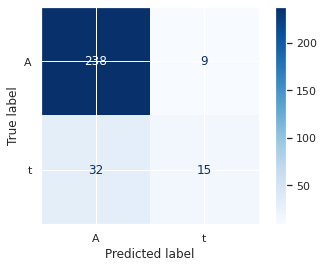

In [102]:
# Plot confusion matrix and ROC curve
np.set_printoptions(precision=2)
disp = plot_confusion_matrix(clf_rf,X_test_2,y_test_2,display_labels=df.Attrition.name,cmap=plt.cm.Blues)

In [103]:
# Build Gradient Boosting classifier
pip_gb = make_pipeline(StandardScaler(),
                       GradientBoostingClassifier(loss="deviance",
                                                  random_state=123))

hyperparam_grid = {"gradientboostingclassifier__max_features": ["log2", 0.5],
                   "gradientboostingclassifier__n_estimators": [100, 300, 500],
                   "gradientboostingclassifier__learning_rate": [0.001, 0.01, 0.1],
                   "gradientboostingclassifier__max_depth": [1, 2, 3]}

gs_gb = GridSearchCV(pip_gb,
                      param_grid=hyperparam_grid,
                      scoring="f1",
                      cv=10,
                      n_jobs=-1)

gs_gb.fit(X_train_u, y_train_u)

print("\033[1m" + "\033[0m" + "The best hyperparameters:")
print("-" * 25)
for hyperparam in gs_gb.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_gb.best_params_[hyperparam])

print("\033[1m" + "\033[94m" + "Best 10-folds CV f1-score: {:.2f}%.".format((gs_gb.best_score_) * 100))

The best hyperparameters:
-------------------------
learning_rate :  0.1
max_depth :  3
max_features :  0.5
n_estimators :  500
Best 10-folds CV f1-score: 95.54%.


### GBT have a F1-Score of 95.5%

In [104]:
# Build logistic model classifier
pip_logmod = make_pipeline(StandardScaler(),
                           LogisticRegression(class_weight="balanced"))

hyperparam_range = np.arange(0.5, 20.1, 0.5)

hyperparam_grid = {"logisticregression__penalty": ["l1", "l2"],
                   "logisticregression__C":  hyperparam_range,
                   "logisticregression__fit_intercept": [True, False]
                  }

gs_logmodel = GridSearchCV(pip_logmod,
                           hyperparam_grid,
                           scoring="accuracy",
                           cv=2,
                           n_jobs=-1)

gs_logmodel.fit(X_train_u, y_train_u)

print("\033[1m" + "\033[0m" + "The best hyperparameters:")
print("-" * 25)
for hyperparam in gs_logmodel.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_logmodel.best_params_[hyperparam])

print("\033[1m" + "\033[94m" + "Best 10-folds CV f1-score: {:.2f}%.".format((gs_logmodel.best_score_) * 100))

The best hyperparameters:
-------------------------
C :  1.0
fit_intercept :  False
penalty :  l2
Best 10-folds CV f1-score: 75.10%.


### Logistic Regression have a F1-Score of 75.10%

### Printing out the Accuracy and f1-score of each model 

In [105]:
estimators = {"RF": clf_rf,
              "LR": gs_logmodel,
              "GBT": gs_gb
             }

# Print out accuracy score on test data
print("The accuracy rate and f1-score on test data are:")
for estimator in estimators.keys():
    print("{}: {:.2f}%, {:.2f}%.".format(estimator,
        accuracy_score(y_test_2, estimators[estimator].predict(X_test_2)) * 100,
         f1_score(y_test_2, estimators[estimator].predict(X_test_2)) * 100))

The accuracy rate and f1-score on test data are:
RF: 86.05%, 42.25%.
LR: 73.47%, 50.00%.
GBT: 85.71%, 58.00%.


### Printing out other important metrics

In [106]:
model_names=['RandomForestClassifier','Logistic Regression','GradientBoostingClassifier']
models = [clf_rf,gs_logmodel,gs_gb]

In [107]:
def compare_models(model):
    clf=model
    clf.fit(X_train_u,y_train_u)
    pred=clf.predict(X_test_2)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test_2))
    prec.append(precision_score(pred,y_test_2))
    rec.append(recall_score(pred,y_test_2))
    auroc.append(roc_auc_score(pred,y_test_2))

In [108]:
acc=[]
prec=[]
rec=[]
auroc=[]

In [109]:
for model in models:
    compare_models(model)
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,RandomForestClassifier,0.860544,0.319149,0.625000,0.753241
1,Logistic Regression,0.734694,0.829787,0.357798,0.657277
2,GradientBoostingClassifier,0.857143,0.617021,0.547170,0.736241


### Finding the Important features

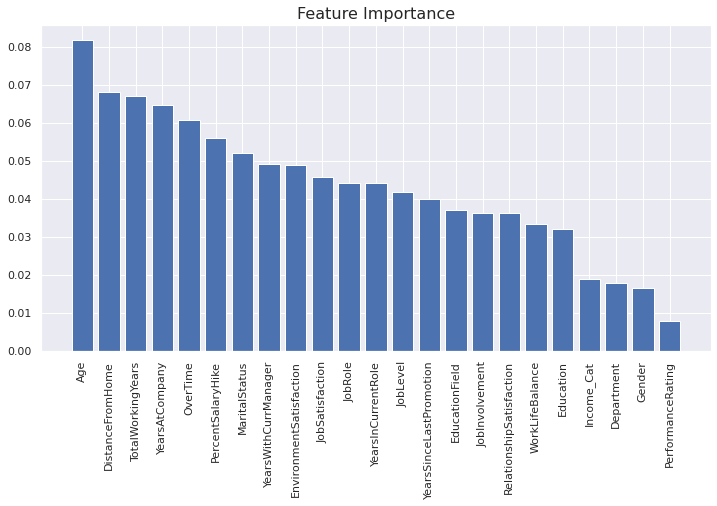

In [110]:
clf_rf = RandomForestClassifier(n_estimators=500,
                                criterion="gini",
                                max_features='sqrt',
                                min_samples_leaf=1,
                                class_weight="balanced",
                                n_jobs=-1,
                                random_state=123)


clf_rf.fit(StandardScaler().fit_transform(X_train_u), y_train_u)

# Plot features importance
importances = clf_rf.feature_importances_
indices = np.argsort(clf_rf.feature_importances_)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 24), importances[indices], align="center")
plt.xticks(range(1, 24), df.columns[df.columns != "Attrition"][indices], rotation=90)
plt.title("Feature Importance", {"fontsize": 16});

**Conclusion:** Age plays a vital role in attrition according to our analysis and model. This can be true as it is normally seen that younger empoloyees tend to switch organizations in order to explore fields and find what best suits them.